In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
data = pd.read_csv('/content/potato_updated5k.csv')
data.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Potato,Whole Year,Dhaka,75259.0,671871,2051.4,7162399.03,23330.29,7.561304
1,Potato,Whole Year,Rajshahi,20764.0,200509,3818.2,1976109.88,6436.84,8.641429
2,Potato,Whole Year,Barisal,284015.0,5581553,1852.9,27029707.55,88044.65,18.237222
3,Potato,Whole Year,Dhaka,76958.0,611077,2354.4,7603450.40,22317.82,7.230435
4,Potato,Monsoon,Chittagong,28755.0,317052,1260.8,2840994.00,8338.95,12.373333


In [ ]:
data.to_csv('/content/rice.csv', index=False)

In [5]:
data.shape

(10000, 9)

In [6]:
data.isnull().sum()

Crop               0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
data.select_dtypes('number').columns

Index(['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide',
       'Yield'],
      dtype='object')

In [8]:
categorical = data.select_dtypes(exclude='number').columns
numerical = data.select_dtypes('number').columns

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['Yield'], axis=1)
y = data.Yield
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
transform = [('OHE', OneHotEncoder(), ['Crop', 'Season', 'State']),
 ('MMS', MinMaxScaler(), ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide'])]
ct = ColumnTransformer(transform)


pro_X_train = ct.fit_transform(X_train)
pro_X_test = ct.transform(X_test)

In [11]:
!pip install xgboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [12]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Your data preparation steps here (pro_X_train, y_train, pro_X_test, y_test)

# Define a list of models
models = [
    #('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),

    #('Support Vector Machine', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('AdaBoost', AdaBoostRegressor())
]

# Define hyperparameters and their possible values for each model
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Support Vector Machine': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [3, 5, 7]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Create lists to store the metrics and models
model_names = []
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []
trained_models = {}

# Create a dictionary to store best hyperparameters
best_params_dict = {}

# Iterate over models and perform grid search
for model_name, model in models:
    print(f"\nPerforming Grid Search for {model_name}...")

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='neg_mean_squared_error', cv=5)

    # Fit the model to the training data
    grid_search.fit(pro_X_train, y_train)

    # Print the best parameters and corresponding score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the best model
    model_filename = f"{model_name}_model.joblib"
    joblib.dump(best_model, model_filename)
    trained_models[model_name] = model_filename

    # Save the best hyperparameters
    best_params_dict[model_name] = grid_search.best_params_

    # Evaluate the model on the test set
    test_predictions = best_model.predict(pro_X_test)

    # Calculate metrics
    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Store metrics in lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Print the best hyperparameters
print("\nBest hyperparameters:")
for model_name, params in best_params_dict.items():
    print(f"{model_name}: {params}")


Streaming output truncated to the last 5000 lines.
23:	learn: 3.9457236	total: 151ms	remaining: 164ms
24:	learn: 3.7934843	total: 155ms	remaining: 155ms
25:	learn: 3.7092208	total: 161ms	remaining: 149ms
26:	learn: 3.5531686	total: 173ms	remaining: 147ms
27:	learn: 3.4617474	total: 178ms	remaining: 140ms
28:	learn: 3.3506218	total: 182ms	remaining: 132ms
29:	learn: 3.2380399	total: 187ms	remaining: 124ms
30:	learn: 3.1185450	total: 191ms	remaining: 117ms
31:	learn: 3.0262947	total: 195ms	remaining: 110ms
32:	learn: 2.9550509	total: 199ms	remaining: 103ms
33:	learn: 2.9026625	total: 203ms	remaining: 95.8ms
34:	learn: 2.8142289	total: 208ms	remaining: 89.3ms
35:	learn: 2.7382750	total: 218ms	remaining: 84.7ms
36:	learn: 2.6729933	total: 226ms	remaining: 79.5ms
37:	learn: 2.6170920	total: 230ms	remaining: 72.6ms
38:	learn: 2.5621847	total: 235ms	remaining: 66.2ms
39:	learn: 2.5143444	total: 244ms	remaining: 60.9ms
40:	learn: 2.4469034	total: 252ms	remaining: 55.3ms
41:	learn: 2.4071983	to

In [14]:
# Display only model names and their results
for name, r2, mae, mse, rmse in zip(model_names, r2_scores, mae_scores, mse_scores, rmse_scores):
    print(f"\nModel: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")



Model: Decision Tree
R-squared (R²): 0.99897616625536
Mean Absolute Error (MAE): 0.07904583906998497
Mean Squared Error (MSE): 0.22470214974951658
Root Mean Squared Error (RMSE): 0.4740275833213892

Model: K-Nearest Neighbors
R-squared (R²): 0.5049632829008224
Mean Absolute Error (MAE): 0.6077572912126628
Mean Squared Error (MSE): 108.64636482189985
Root Mean Squared Error (RMSE): 10.423356696472583

Model: Random Forest
R-squared (R²): 0.9994094778910917
Mean Absolute Error (MAE): 0.08376337204517009
Mean Squared Error (MSE): 0.12960267039544573
Root Mean Squared Error (RMSE): 0.36000370886345845

Model: Gradient Boosting
R-squared (R²): 0.9972919484638642
Mean Absolute Error (MAE): 0.3630058383882305
Mean Squared Error (MSE): 0.5943396620670869
Root Mean Squared Error (RMSE): 0.7709342786950694

Model: XGBoost
R-squared (R²): 0.9989978404568942
Mean Absolute Error (MAE): 0.25906748663893425
Mean Squared Error (MSE): 0.2199452839943612
Root Mean Squared Error (RMSE): 0.46898324489725

In [15]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import joblib
import numpy as np

# Load individual models
xg_model = joblib.load("/content/XGBoost_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
xg_model.fit(pro_X_train, y_train)
rf_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'Xg': xg_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}

ensemble_models = [
    ('Voting', VotingRegressor(estimators=[('XGB', xg_model), ('rf', rf_model), ('gb', gb_model)])),
    ('Stacking', StackingRegressor(estimators=[('XGB', xg_model), ('rf', rf_model), ('gb', gb_model)],
                                   final_estimator=LinearRegression())),
    ('Bagging', BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10))
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models
for ensemble_name, ensemble_model in ensemble_models:
    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    ensemble_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = ensemble_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(ensemble_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)



Evaluating Voting...
R-squared (R²) for Voting: 0.9992508285261162
Mean Absolute Error (MAE) for Voting: 0.21711568376423765
Mean Squared Error (MSE) for Voting: 0.16442165692817223
Root Mean Squared Error (RMSE) for Voting: 0.4054894042119624

Evaluating Stacking...
R-squared (R²) for Stacking: 0.9959909226502844
Mean Absolute Error (MAE) for Stacking: 0.626532198811723
Mean Squared Error (MSE) for Stacking: 0.879877522800301
Root Mean Squared Error (RMSE) for Stacking: 0.9380178691263301

Evaluating Bagging...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared (R²) for Bagging: 0.22568391266953025
Mean Absolute Error (MAE) for Bagging: 2.9118617456052096
Mean Squared Error (MSE) for Bagging: 169.94017858824404
Root Mean Squared Error (RMSE) for Bagging: 13.036110562136393

Ensemble Model: Voting
R-squared (R²): 0.9992508285261162
Mean Absolute Error (MAE): 0.21711568376423765
Mean Squared Error (MSE): 0.16442165692817223
Root Mean Squared Error (RMSE): 0.4054894042119624

Ensemble Model: Stacking
R-squared (R²): 0.9959909226502844
Mean Absolute Error (MAE): 0.626532198811723
Mean Squared Error (MSE): 0.879877522800301
Root Mean Squared Error (RMSE): 0.9380178691263301

Ensemble Model: Bagging
R-squared (R²): 0.22568391266953025
Mean Absolute Error (MAE): 2.9118617456052096
Mean Squared Error (MSE): 169.94017858824404
Root Mean Squared Error (RMSE): 13.036110562136393

Ensemble Models Saved:
voting_model.pkl
stacking_model.pkl
bagging_model.pkl


In [2]:
import pandas as pd
import numpy as np

# Specify the path to your original CSV file
csv_file_path = '/content/potato.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Drop the 'Crop_Year' column
df = df.drop(columns=['Crop_Year'])

# Subtract specific values from columns before creating new rows


# Get the number of rows you want to create
target_rows = 10000

# Duplicate rows randomly to reach the target number of rows
while len(df) < target_rows:
    # Randomly choose an index from the existing rows
    random_index = np.random.choice(len(df))

    # Select the row at the random index
    random_row = df.iloc[random_index].copy()

    # Modify the 'Yield' column by dividing the value by areas
    random_row['Annual_Rainfall'] -= 200
    random_row['Fertilizer'] -= 1000000  # Subtract 10 lakhs
    random_row['Pesticide'] -= 3000
    random_row['Yield'] = random_row['Production'] / random_row['Area']

    # Append the modified row to the DataFrame
    df = df.append(random_row, ignore_index=True)

# Save the updated DataFrame to a new CSV file
output_csv_path = '/content/potato_updated5k.csv'
df.to_csv(output_csv_path, index=False)

# Display the updated DataFrame
print(df)

<ipython-input-2-666e3981deff>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(random_row, ignore_index=True)


        Crop      Season       State      Area  Production  Annual_Rainfall  \
0     Potato  Whole Year       Dhaka   75259.0      671871           2051.4   
1     Potato  Whole Year    Rajshahi   20764.0      200509           3818.2   
2     Potato  Whole Year     Barisal  284015.0     5581553           1852.9   
3     Potato  Whole Year       Dhaka   76958.0      611077           2354.4   
4     Potato     Monsoon  Chittagong   28755.0      317052           1260.8   
...      ...         ...         ...       ...         ...              ...   
9995  Potato      Winter     Jessore     994.0       10912            268.2   
9996  Potato  Whole Year    Dinajpur  121449.0     3655606            -74.6   
9997  Potato      Winter     Gazipur    5779.0       63010            146.2   
9998  Potato      Winter     Gazipur    5779.0       63010            146.2   
9999  Potato  Whole Year    Noakhali      79.0        1325           -985.4   

       Fertilizer  Pesticide      Yield  
0      71

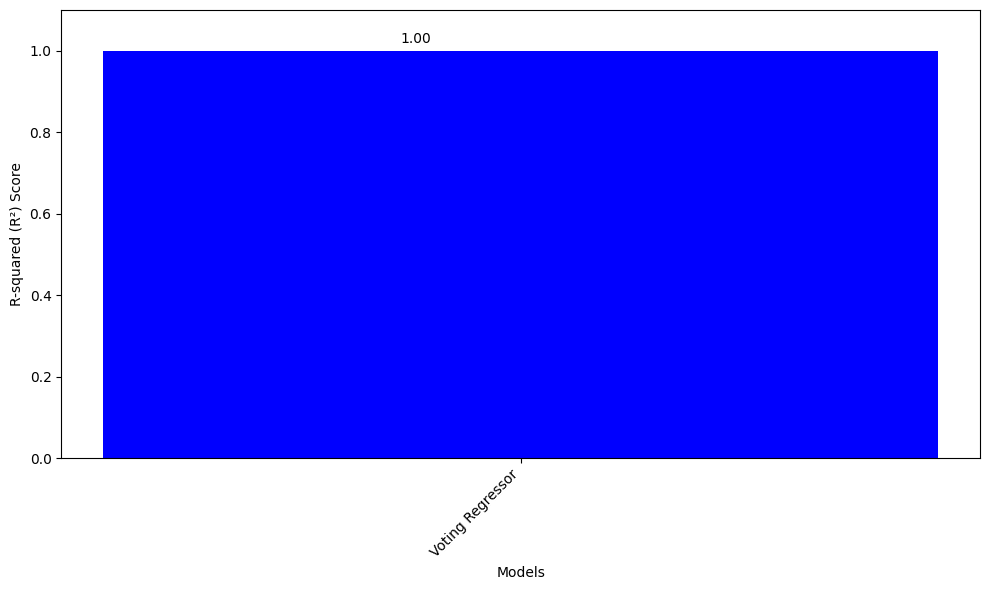

In [16]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# knn_model = joblib.load("/content/stacking_model.pkl")
# rf_model = joblib.load("/content/Random Forest_model.joblib")
# gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
# ada_model = joblib.load("/content/AdaBoost_model.joblib")
# cat_model = joblib.load("/content/CatBoost_model.joblib")
# linear_model = joblib.load("/content/Linear Regression_model.joblib")
# svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
# xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    # 'K-Nearest Neighbors': knn_model,
    # 'Random Forest': rf_model,
    # 'Gradient Boosting': gb_model,
    # 'AdaBoost': ada_model,
    # 'CatBoost': cat_model,
    # 'Linear Regression': linear_model,
    # 'Support Vector Machine': svm_model,
    # 'XGBoost': xgb_model,
    'Voting Regressor': tree_model,
}

# Evaluate and store R-squared scores for each model
r2_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('R-squared (R²) Score')
# plt.title('R-squared Scores for Different Models')
plt.ylim(0, 1.1)  # Set the y-axis limit based on your R-squared range (0 to 1)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add R-squared values on top of the bars
for bar, r2_score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{r2_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


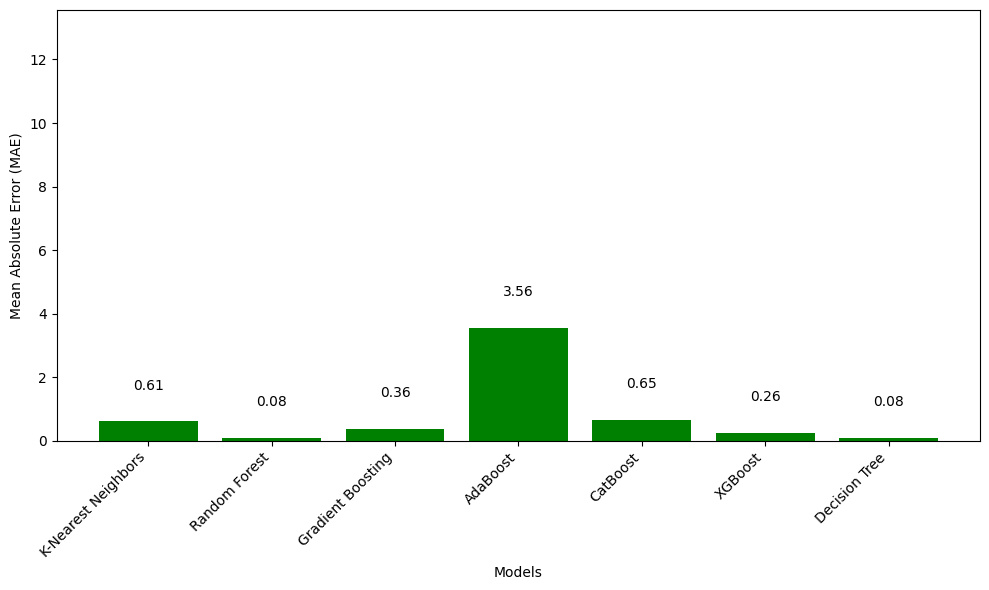

In [17]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")

#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store MAE scores for each model
mae_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Create a bar chart for MAE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_scores) + 10)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')
# plt.title('Mean Absolute Error (MAE) for Different Models')

# Add MAE values on top of the bars with improved placement
for bar, mae_score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{mae_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


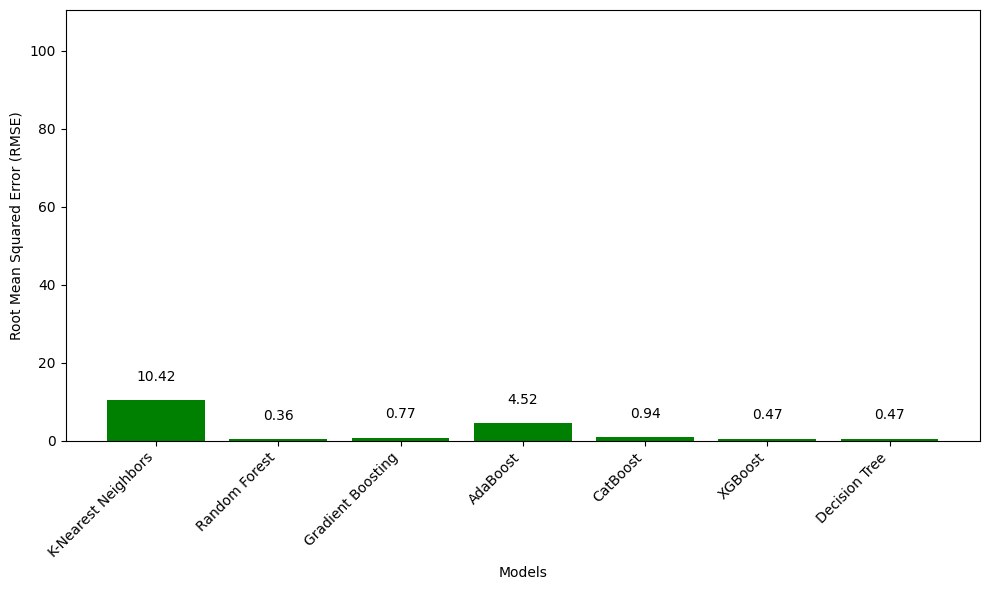

In [18]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/Decision Tree_model.joblib")
knn_model = joblib.load("/content/K-Nearest Neighbors_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")
ada_model = joblib.load("/content/AdaBoost_model.joblib")
cat_model = joblib.load("/content/CatBoost_model.joblib")
#linear_model = joblib.load("/content/Linear Regression_model.joblib")
#svm_model = joblib.load("/content/Support Vector Machine_model.joblib")
xgb_model = joblib.load("/content/XGBoost_model.joblib")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)

# Create a bar chart for RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores) + 100)  # Set the y-axis limit
plt.xticks(rotation=45, ha='right')

# Add RMSE values on top of the bars with improved placement
for bar, rmse_score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{rmse_score:.2f}', ha='center', color='black', fontsize=10)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [20]:
from sklearn.ensemble import VotingRegressor, StackingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import joblib
import numpy as np

# Load individual models
knn_model = joblib.load("/content/XGBoost_model.joblib")
rf_model = joblib.load("/content/Random Forest_model.joblib")
gb_model = joblib.load("/content/Gradient Boosting_model.joblib")

# Load your test data (replace this line with your actual test data loading)
# pro_X_test = ...

# Fit individual models if not already fitted
knn_model.fit(pro_X_train, y_train)
rf_model.fit(pro_X_train, y_train)
gb_model.fit(pro_X_train, y_train)

models = {'KNN': knn_model, 'Random Forest': rf_model, 'Gradient Boosting': gb_model}

final_estimators = [
    ('Decision Tree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=50, learning_rate=1.0)),
    ('Gradient Boosting', GradientBoostingRegressor()),
   # ('SVR', SVR(kernel='linear')),
    ('KNN', KNeighborsRegressor()),
    ('CatBoost', CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE')),
    #('Linear Regression', LinearRegression()),
    ('Gradient Boosting Base', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor())
]

# Create lists to store the metrics
ensemble_names = []
ensemble_r2_scores = []
ensemble_mae_scores = []
ensemble_mse_scores = []
ensemble_rmse_scores = []
ensemble_models_saved = []

# Evaluate ensemble models with different final estimators
for final_name, final_estimator in final_estimators:
    stacking_model = StackingRegressor(
        estimators=[('knn', knn_model), ('rf', rf_model), ('gb', gb_model)],
        final_estimator=final_estimator
    )

    ensemble_name = f'Stacking with {final_name} as Final Estimator'

    print(f"\nEvaluating {ensemble_name}...")

    # Fit the ensemble model
    stacking_model.fit(pro_X_train, y_train)

    # Predict on the test set using the ensemble model
    ensemble_predictions = stacking_model.predict(pro_X_test)

    # Calculate metrics
    ensemble_r2 = r2_score(y_test, ensemble_predictions)
    ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
    ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
    ensemble_rmse = np.sqrt(ensemble_mse)

    # Print metrics
    print(f"R-squared (R²) for {ensemble_name}: {ensemble_r2}")
    print(f"Mean Absolute Error (MAE) for {ensemble_name}: {ensemble_mae}")
    print(f"Mean Squared Error (MSE) for {ensemble_name}: {ensemble_mse}")
    print(f"Root Mean Squared Error (RMSE) for {ensemble_name}: {ensemble_rmse}")

    # Store metrics in lists
    ensemble_names.append(ensemble_name)
    ensemble_r2_scores.append(ensemble_r2)
    ensemble_mae_scores.append(ensemble_mae)
    ensemble_mse_scores.append(ensemble_mse)
    ensemble_rmse_scores.append(ensemble_rmse)

    # Save the fitted ensemble model
    model_filename = f"{ensemble_name.lower().replace(' ', '_')}_model.pkl"
    joblib.dump(stacking_model, model_filename)
    ensemble_models_saved.append(model_filename)

# Display only ensemble model names and their results
for name, r2, mae, mse, rmse in zip(ensemble_names, ensemble_r2_scores, ensemble_mae_scores, ensemble_mse_scores, ensemble_rmse_scores):
    print(f"\nEnsemble Model: {name}")
    print(f"R-squared (R²): {r2}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

print("\nEnsemble Models Saved:")
for filename in ensemble_models_saved:
    print(filename)



Evaluating Stacking with Decision Tree as Final Estimator...
R-squared (R²) for Stacking with Decision Tree as Final Estimator: 0.9988163671313086
Mean Absolute Error (MAE) for Stacking with Decision Tree as Final Estimator: 0.13417211526873357
Mean Squared Error (MSE) for Stacking with Decision Tree as Final Estimator: 0.2597734754314591
Root Mean Squared Error (RMSE) for Stacking with Decision Tree as Final Estimator: 0.5096797773420672

Evaluating Stacking with AdaBoost as Final Estimator...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R-squared (R²) for Stacking with AdaBoost as Final Estimator: 0.9603797619318158
Mean Absolute Error (MAE) for Stacking with AdaBoost as Final Estimator: 1.5638538484649944
Mean Squared Error (MSE) for Stacking with AdaBoost as Final Estimator: 8.69550619338011
Root Mean Squared Error (RMSE) for Stacking with AdaBoost as Final Estimator: 2.9488143707904215

Evaluating Stacking with Gradient Boosting as Final Estimator...
R-squared (R²) for Stacking with Gradient Boosting as Final Estimator: 0.9993227234018632
Mean Absolute Error (MAE) for Stacking with Gradient Boosting as Final Estimator: 0.17835002747325968
Mean Squared Error (MSE) for Stacking with Gradient Boosting as Final Estimator: 0.1486427932006582
Root Mean Squared Error (RMSE) for Stacking with Gradient Boosting as Final Estimator: 0.3855422067694511

Evaluating Stacking with KNN as Final Estimator...
R-squared (R²) for Stacking with KNN as Final Estimator: 0.9994119822209991
Mean Absolute Error (MAE) for Stacking with KNN a

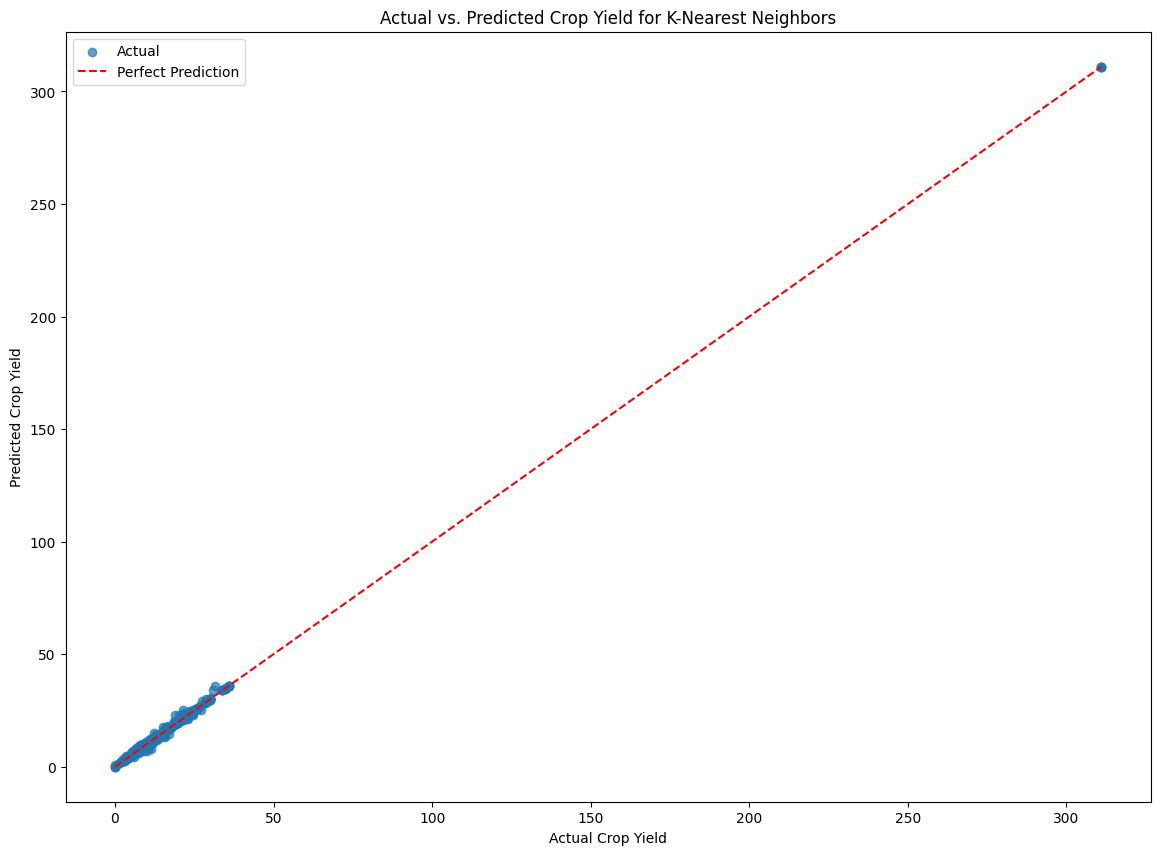

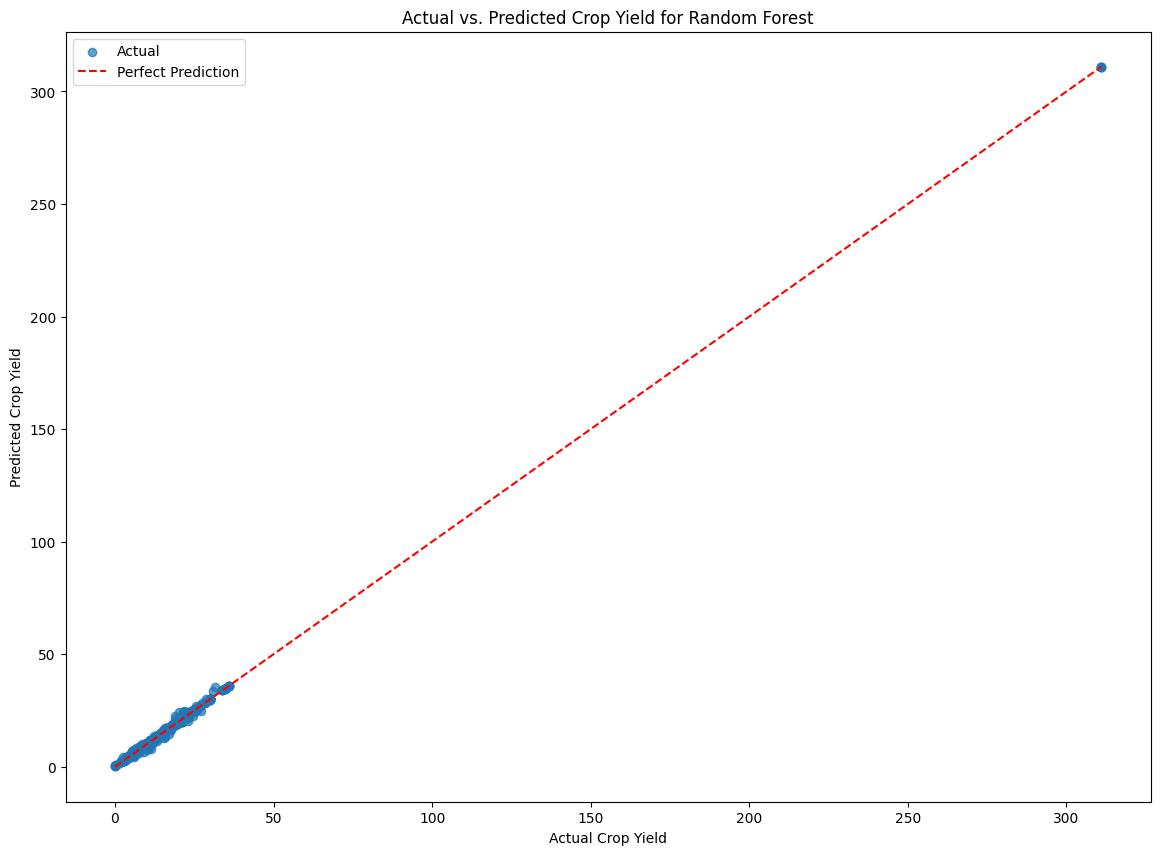

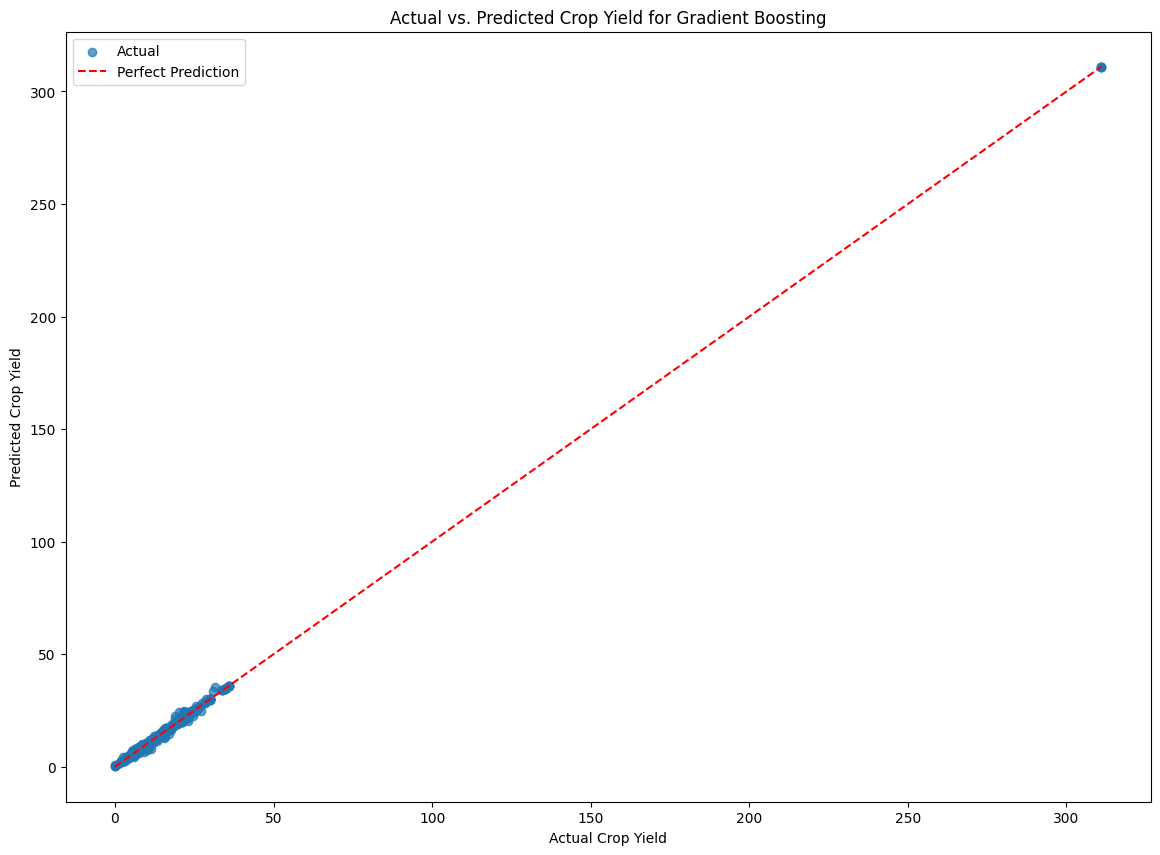

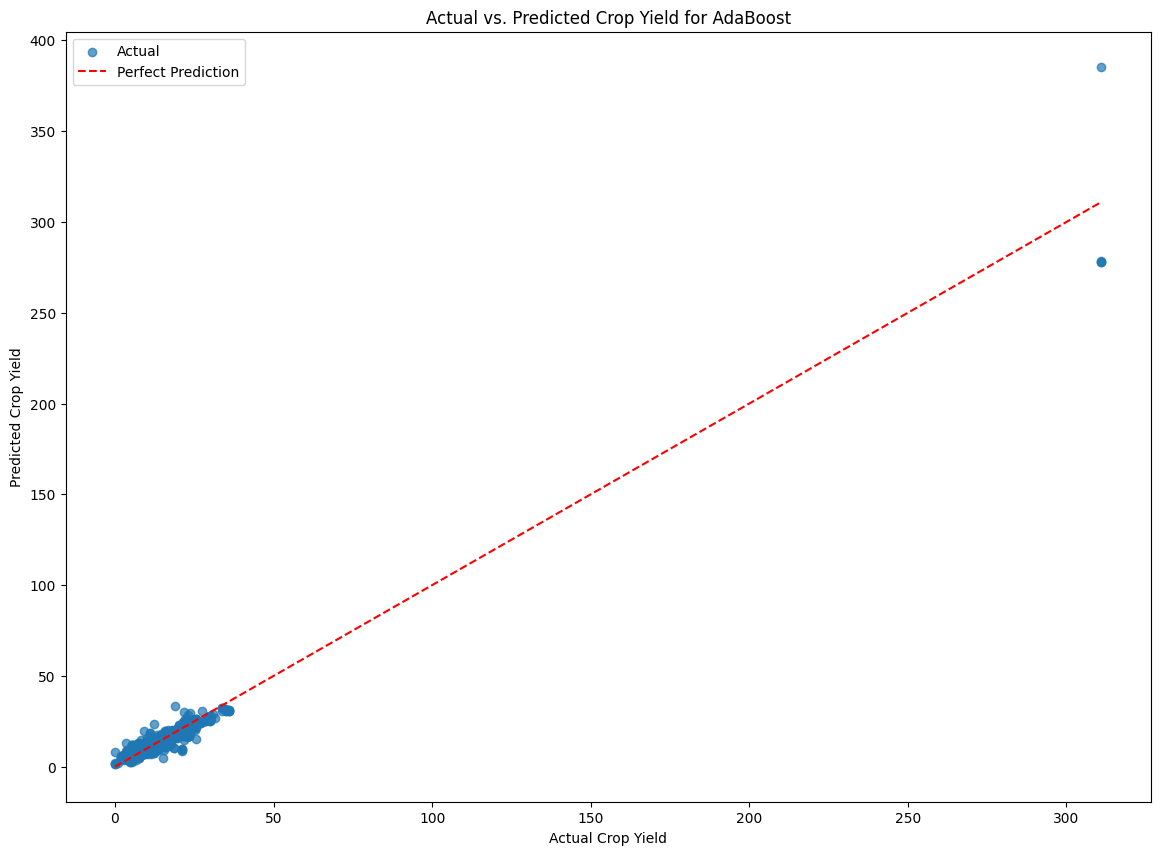

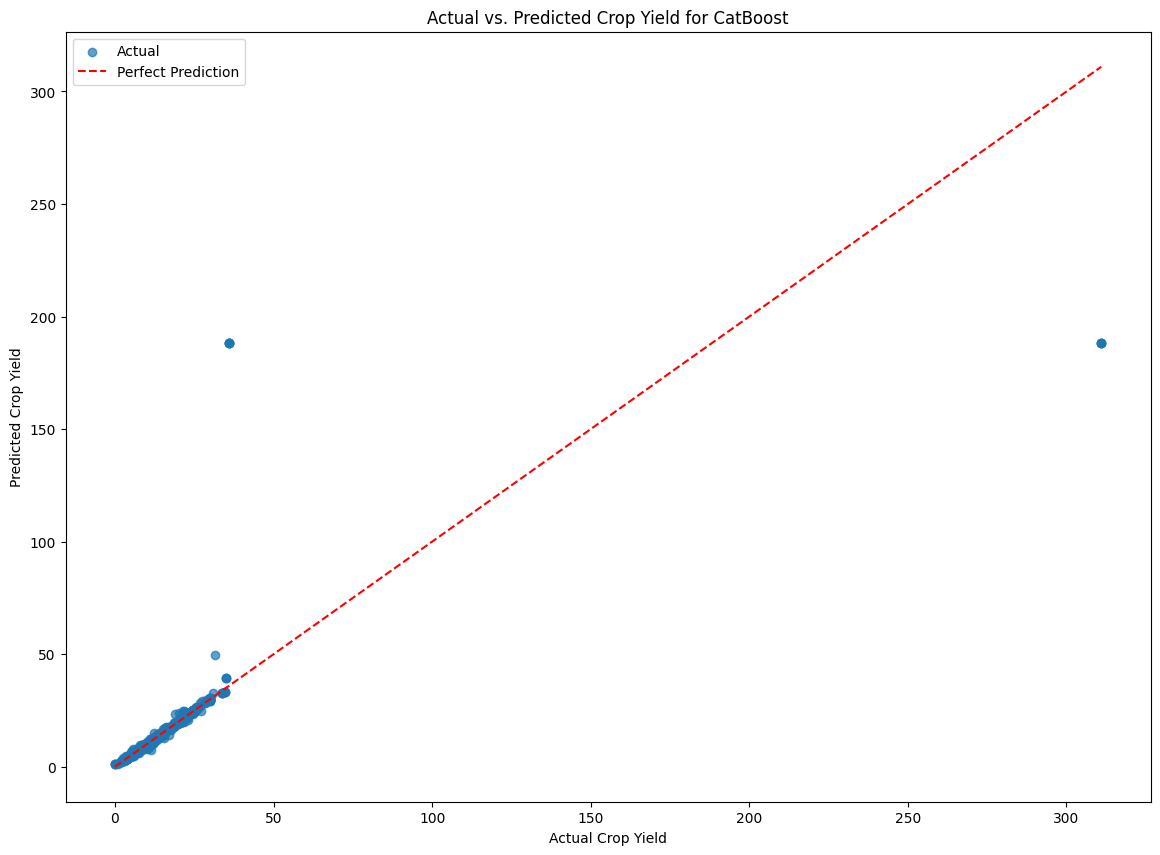

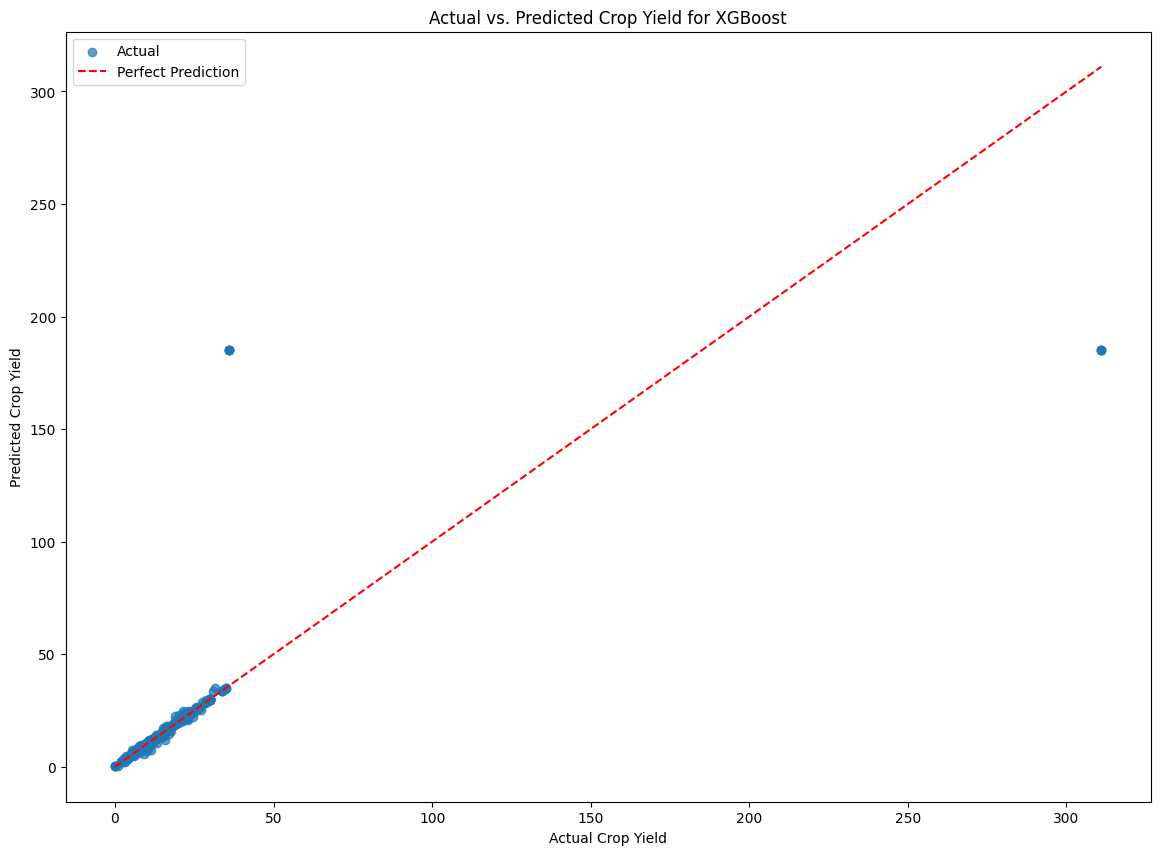

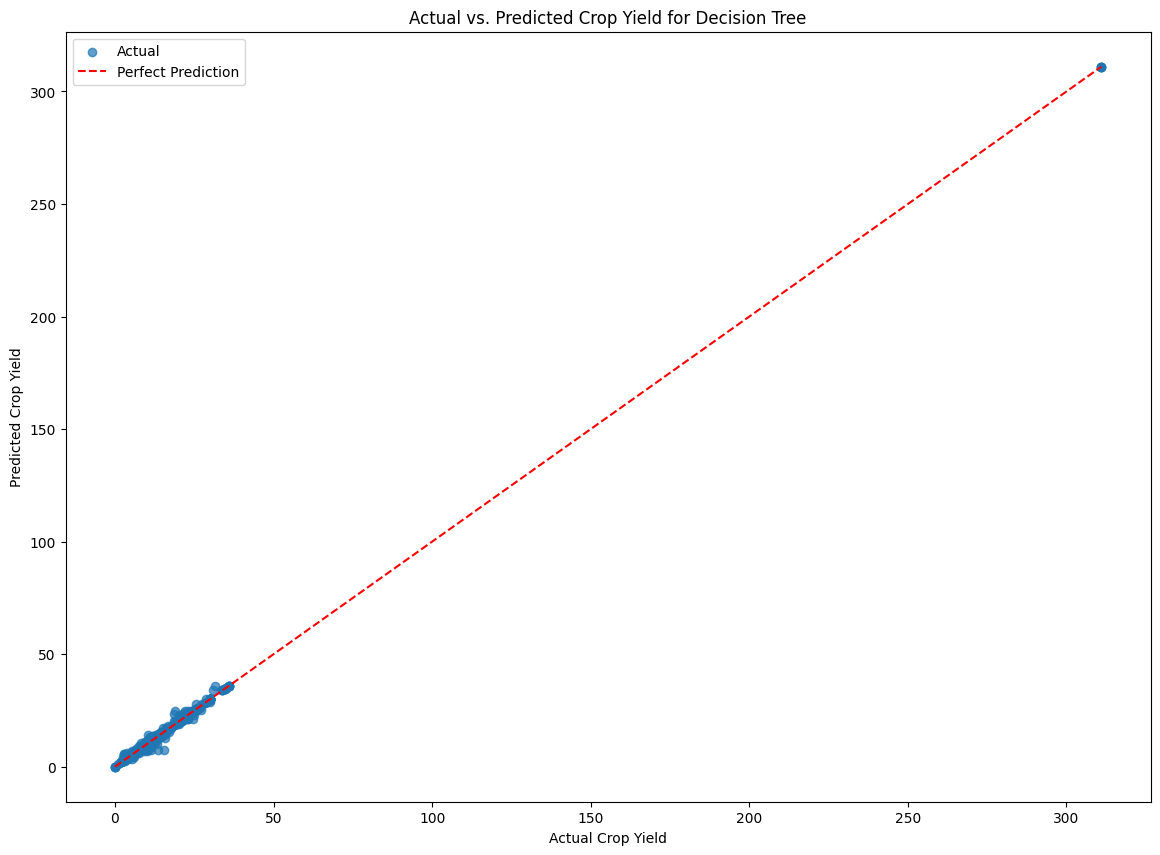

In [21]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/stacking_with_decision_tree_as_final_estimator_model.pkl")
knn_model = joblib.load("/content/stacking_with_knn_as_final_estimator_model.pkl")
rf_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
gb_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
ada_model = joblib.load("/content/stacking_with_adaboost_as_final_estimator_model.pkl")
cat_model = joblib.load("/content/stacking_with_catboost_as_final_estimator_model.pkl")
#linear_model = joblib.load("/content/svr_bagging_model.pkl")
#svm_model = joblib.load("/content/stacking_with_svr_as_final_estimator_model.pkl")
xgb_model = joblib.load("/content/stacking_with_xgboost_as_final_estimator_model.pkl")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())
predictions_dict = {}

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    predictions_dict[model_name] = {'actual': y_test, 'predicted': test_predictions}

# Scatter plot for actual vs. predicted for each model
for model_name, predictions in predictions_dict.items():
    plt.figure(figsize=(14, 10))
    plt.scatter(predictions['actual'], predictions['predicted'], label='Actual', alpha=0.7)
    plt.plot([min(predictions['actual']), max(predictions['actual'])], [min(predictions['actual']), max(predictions['actual'])], '--', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"Actual vs. Predicted Crop Yield for {model_name}")
    plt.legend()
    plt.show()


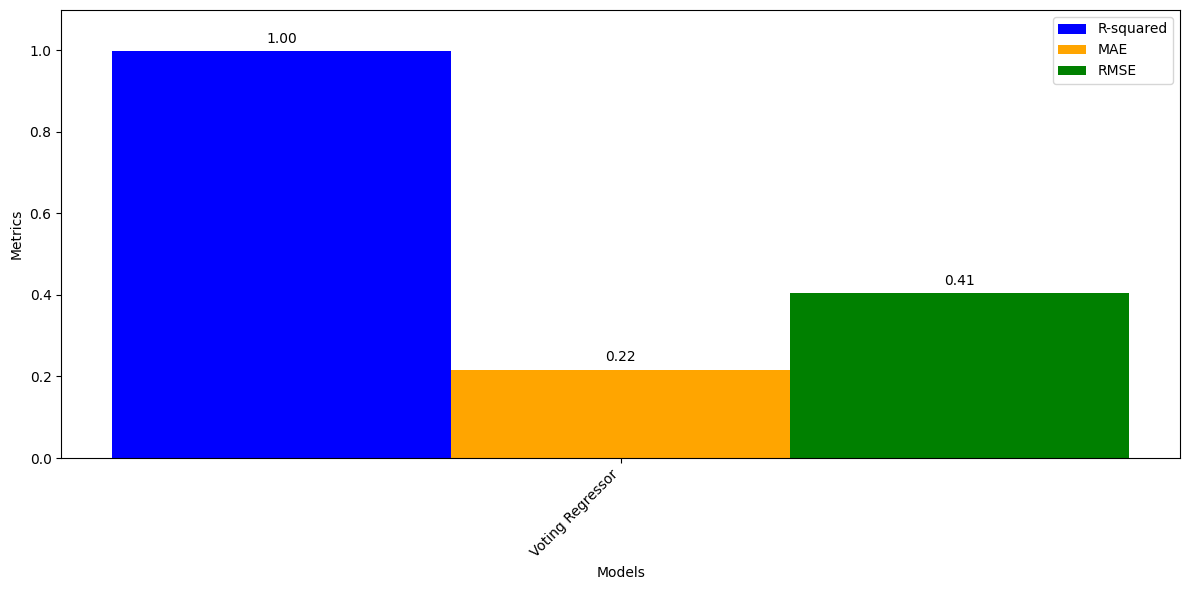

In [22]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/voting_model.pkl")
# Add other models as needed

# Create a dictionary for loaded models
loaded_models = {
    'Voting Regressor': tree_model,
    # Add other models as needed
}

# Evaluate and store metrics for each model
metrics = {'R-squared': [], 'MAE': [], 'RMSE': []}
model_names = list(loaded_models.keys())

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)

    r2 = r2_score(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    metrics['R-squared'].append(r2)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot R-squared
plt.bar(np.arange(len(model_names)) - 0.2, metrics['R-squared'], width=0.2, label='R-squared', color='blue')
# Plot MAE
plt.bar(np.arange(len(model_names)), metrics['MAE'], width=0.2, label='MAE', color='orange')
# Plot RMSE
plt.bar(np.arange(len(model_names)) + 0.2, metrics['RMSE'], width=0.2, label='RMSE', color='green')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.ylim(0, max(max(metrics['R-squared']), max(metrics['MAE']), max(metrics['RMSE'])) + 0.1)
plt.xticks(np.arange(len(model_names)), model_names, rotation=45, ha='right')

# Add metric values on top of the bars
for i, model_name in enumerate(model_names):
    plt.text(i - 0.2, metrics['R-squared'][i] + 0.02, f'{metrics["R-squared"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i, metrics['MAE'][i] + 0.02, f'{metrics["MAE"][i]:.2f}', ha='center', color='black', fontsize=10)
    plt.text(i + 0.2, metrics['RMSE'][i] + 0.02, f'{metrics["RMSE"][i]:.2f}', ha='center', color='black', fontsize=10)

plt.legend()
plt.tight_layout()

plt.show()


<ipython-input-23-37be8afffa6a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


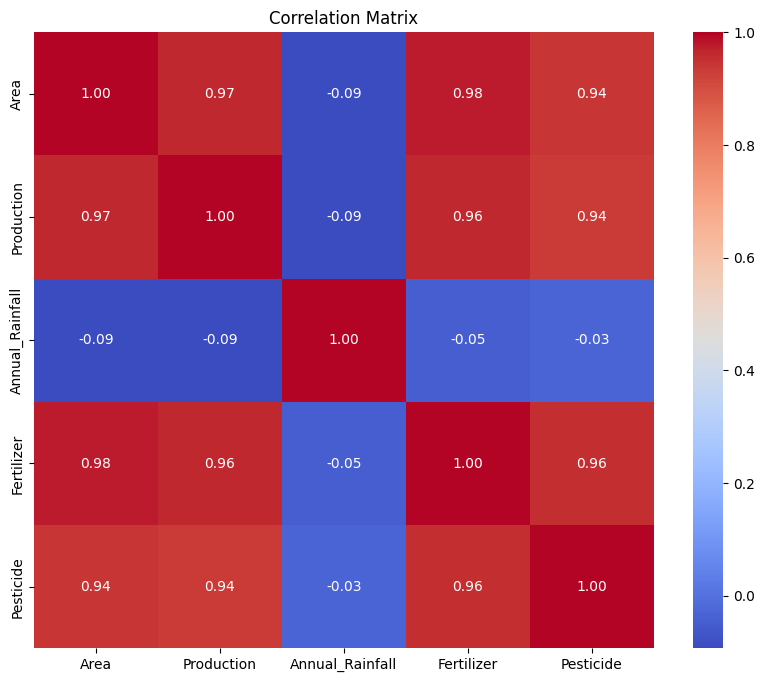

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is a DataFrame
correlation_matrix = X_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


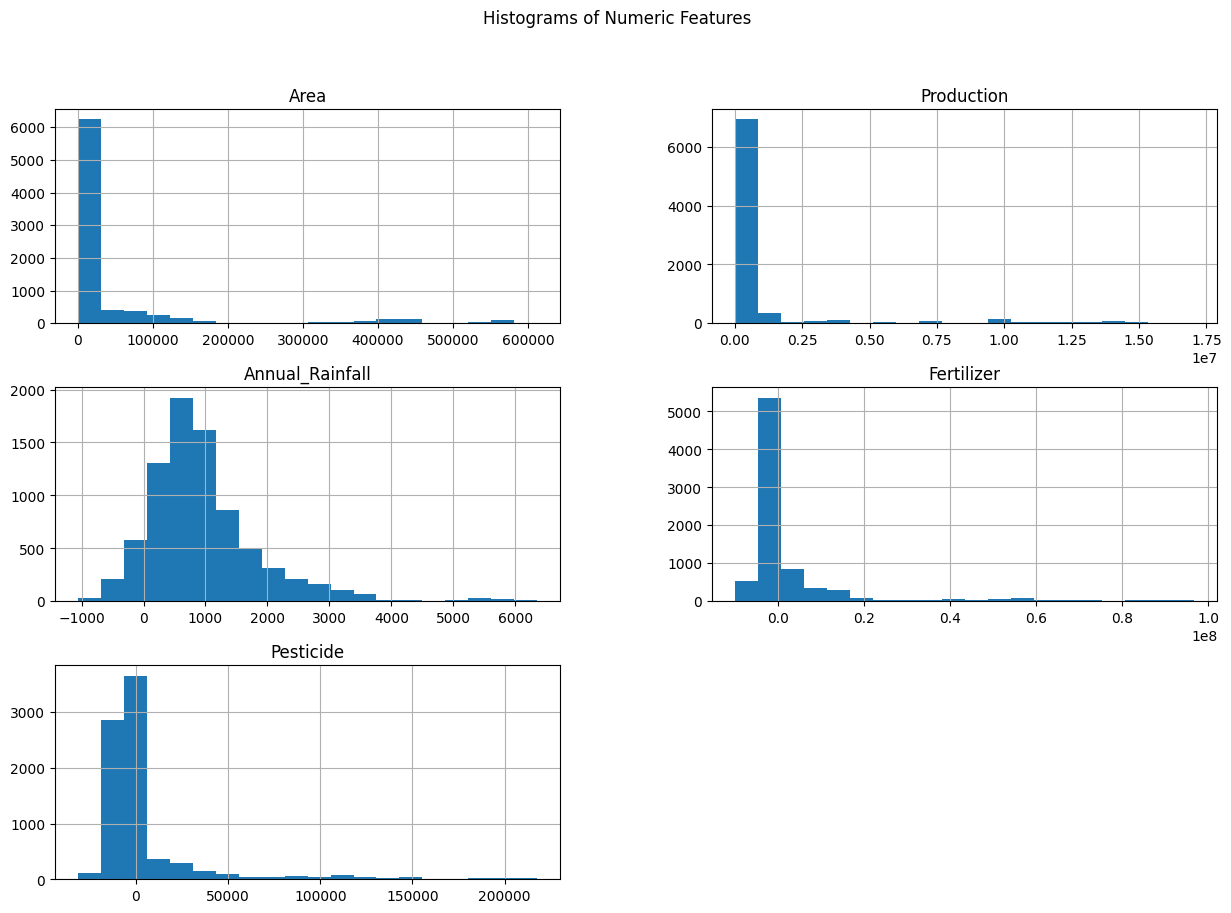

In [24]:
import matplotlib.pyplot as plt

X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()


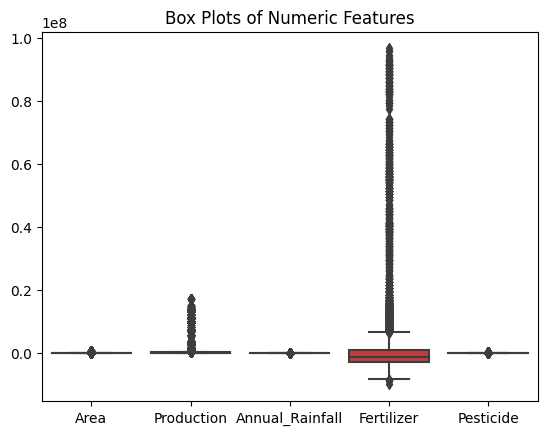

In [25]:
import seaborn as sns

sns.boxplot(data=X_train[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']])
plt.title('Box Plots of Numeric Features')
plt.show()


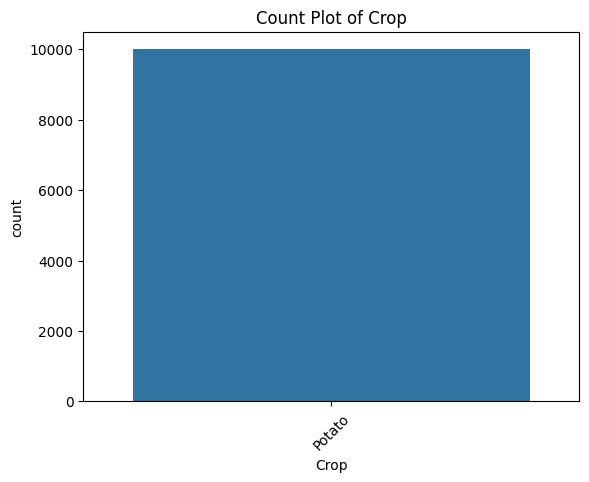

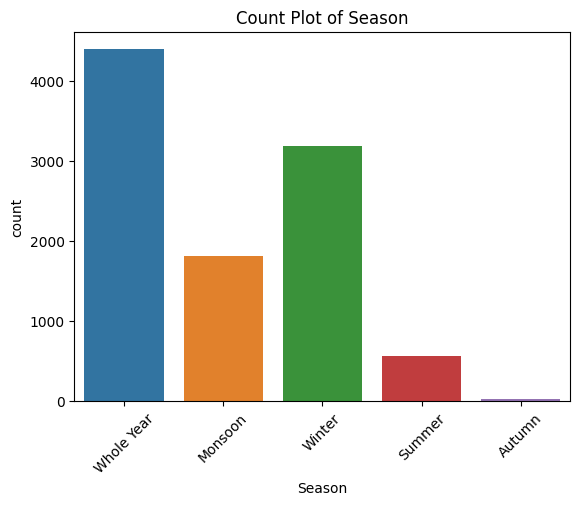

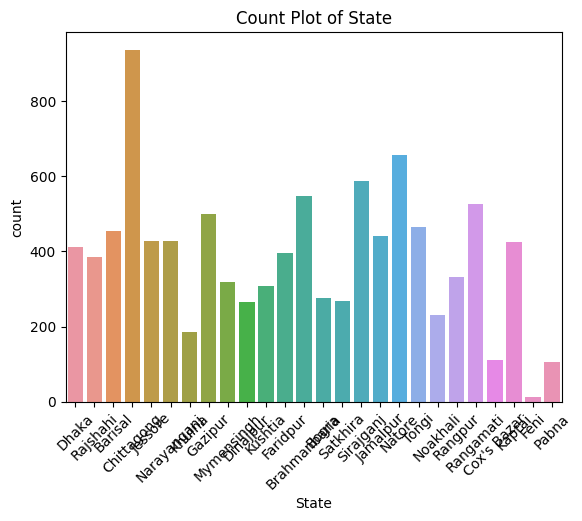

In [26]:
for column in ['Crop', 'Season', 'State']:
    sns.countplot(x=column, data=data)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)  # Adjust the rotation angle as needed
    plt.show()


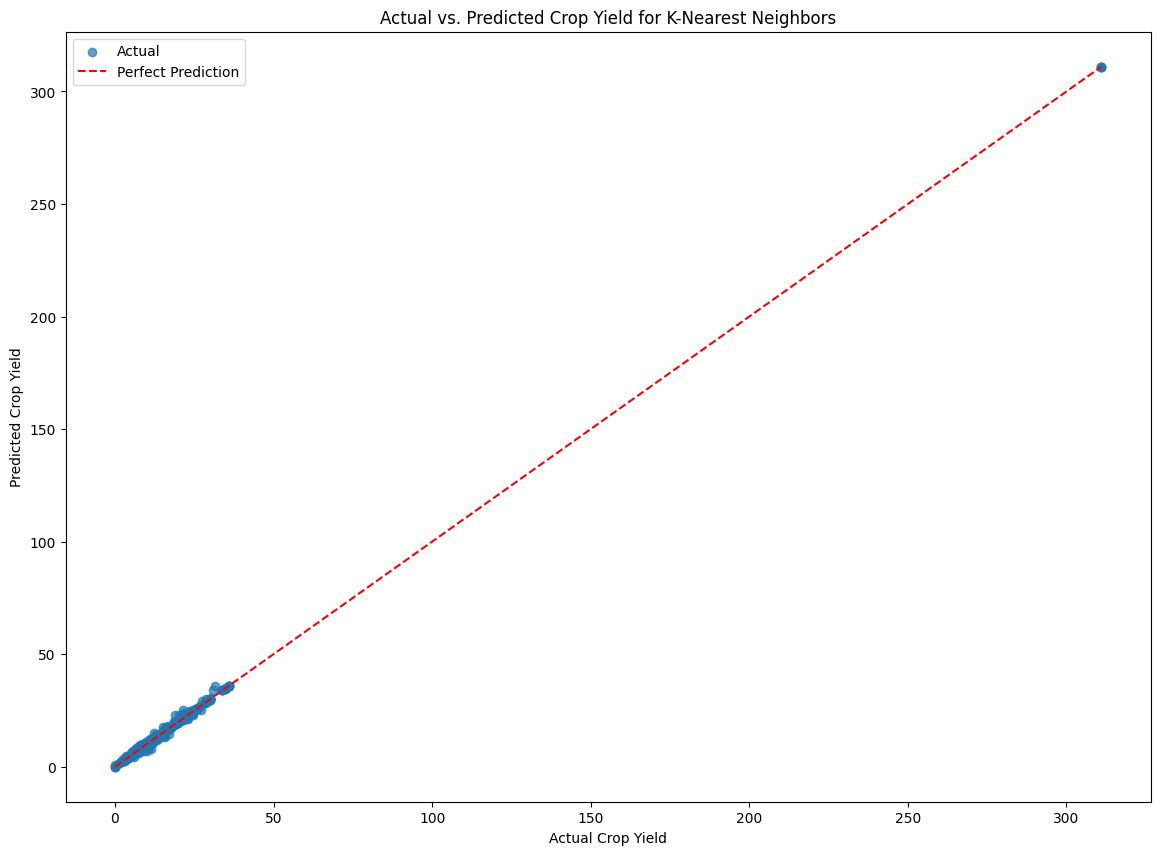

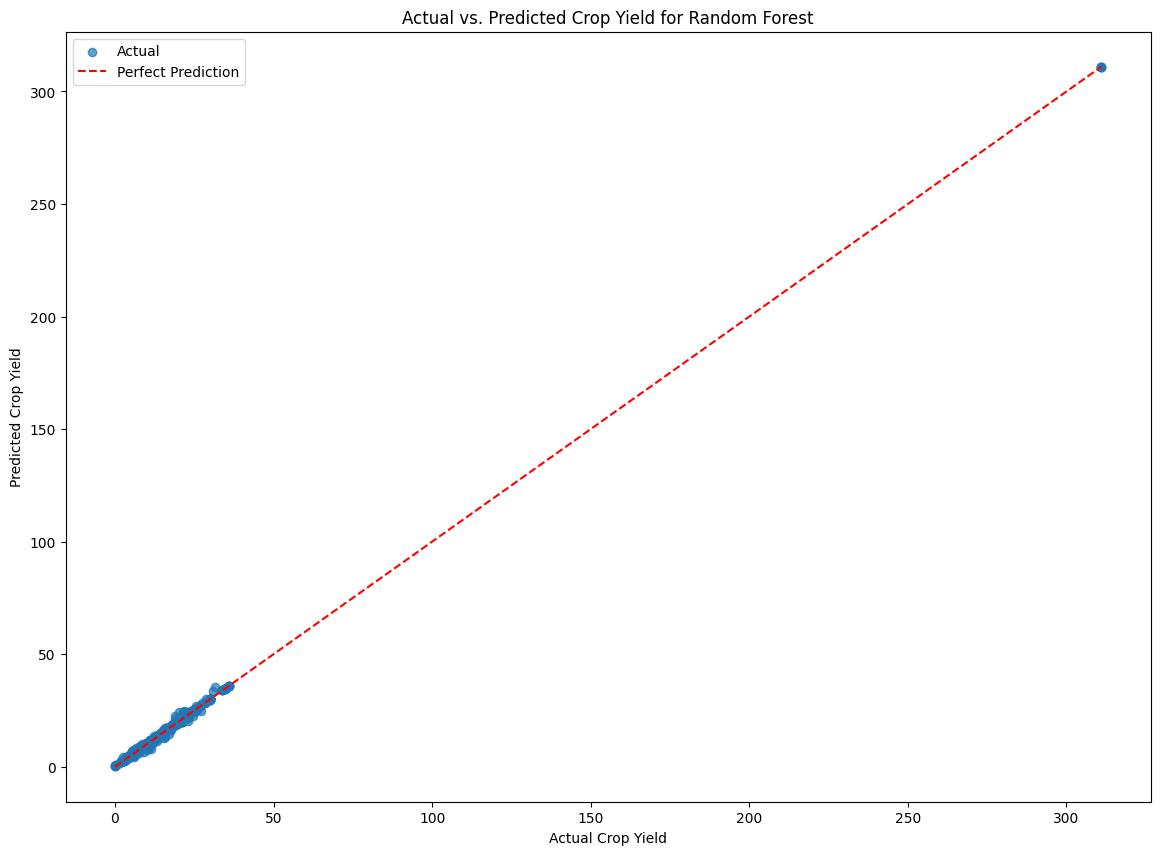

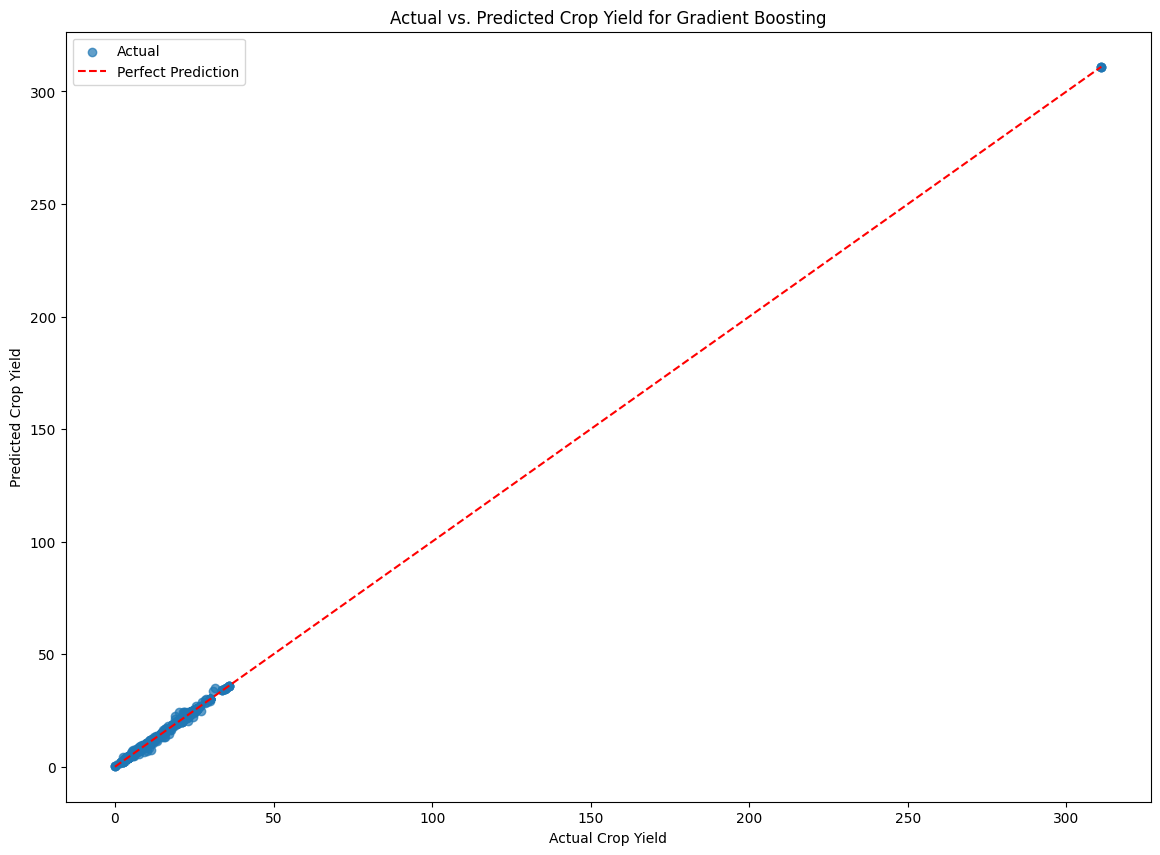

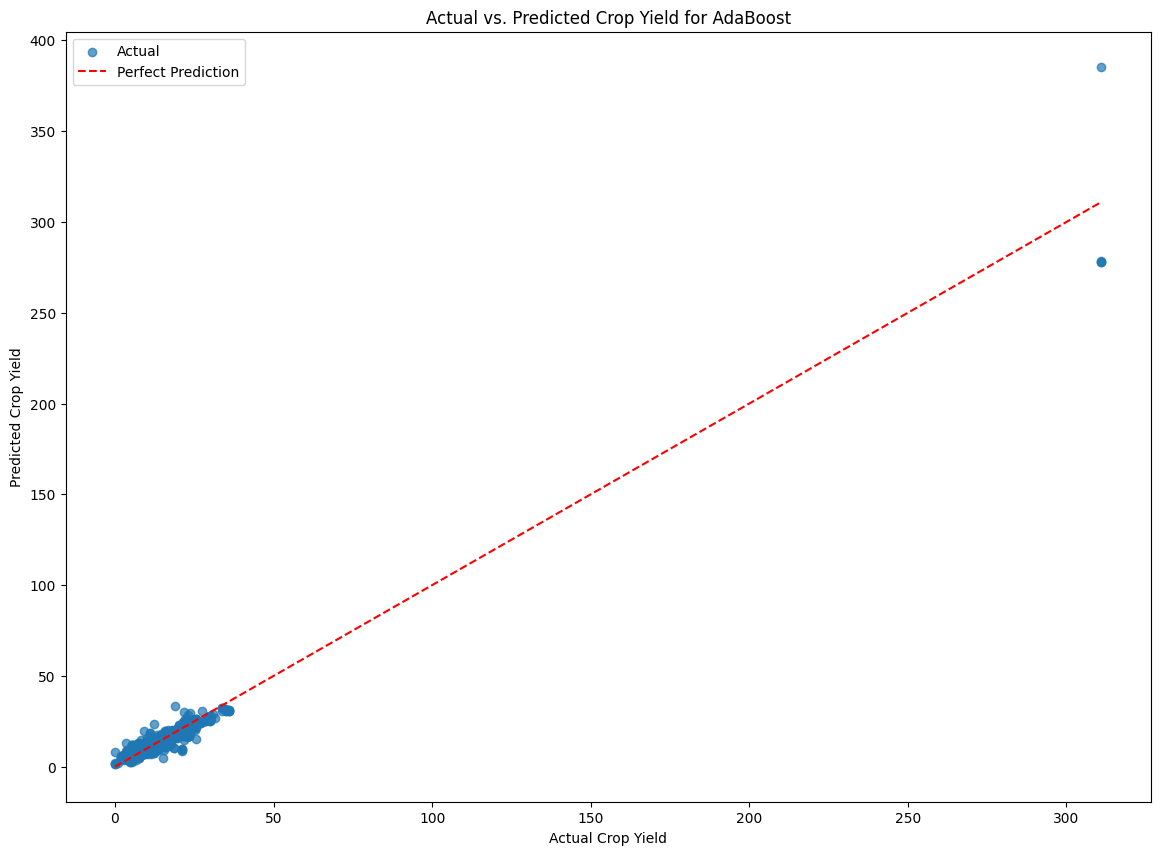

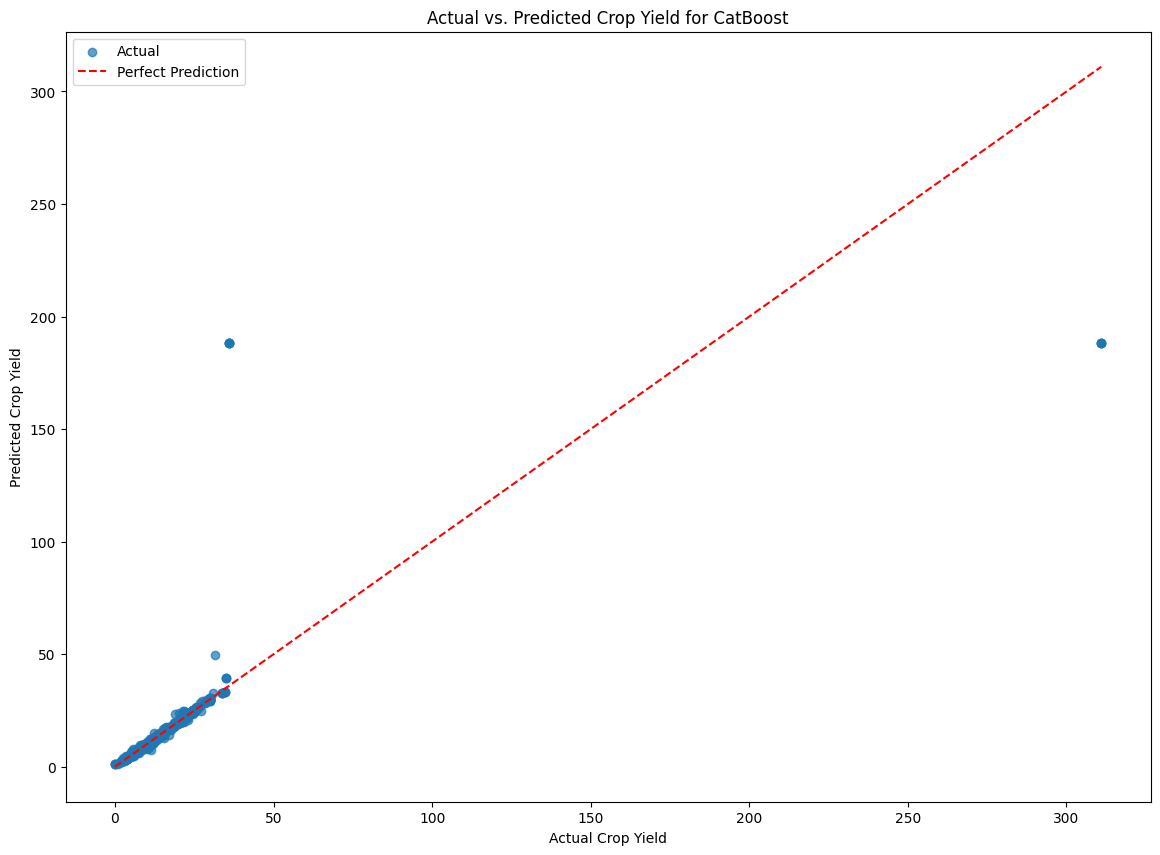

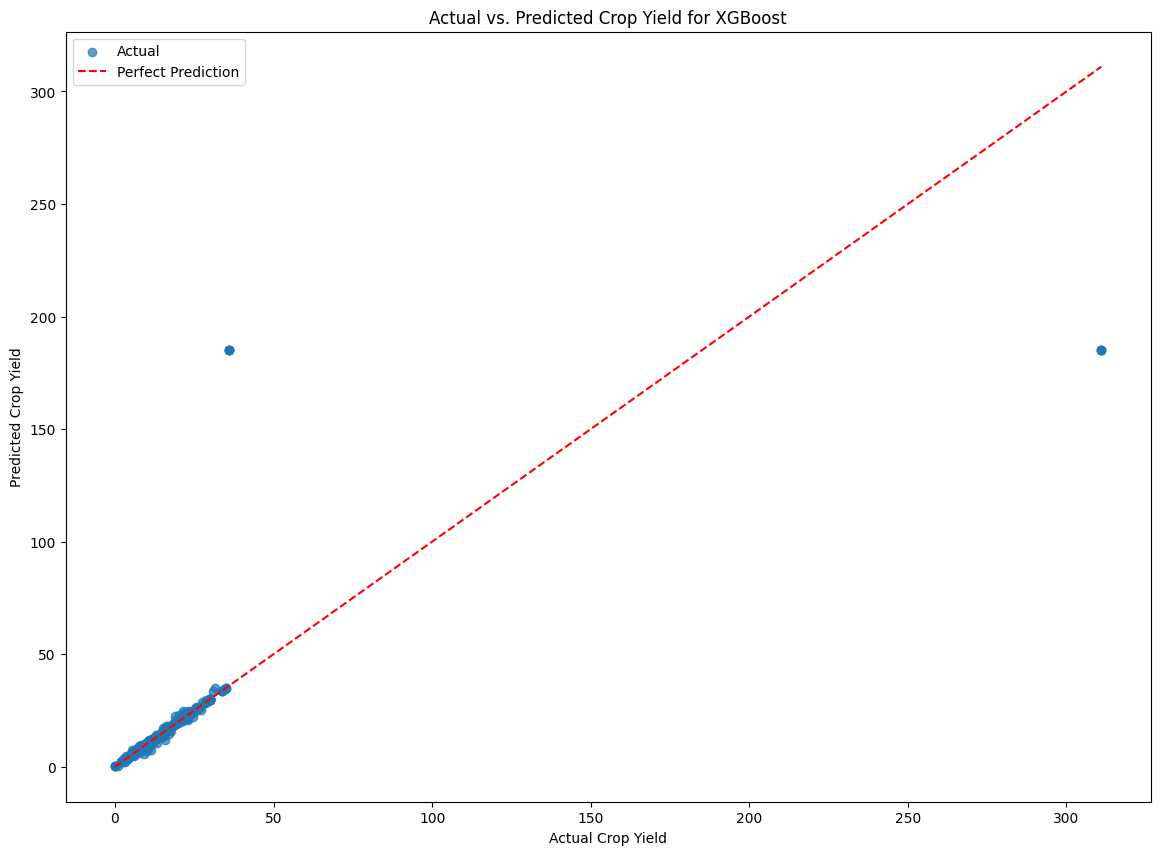

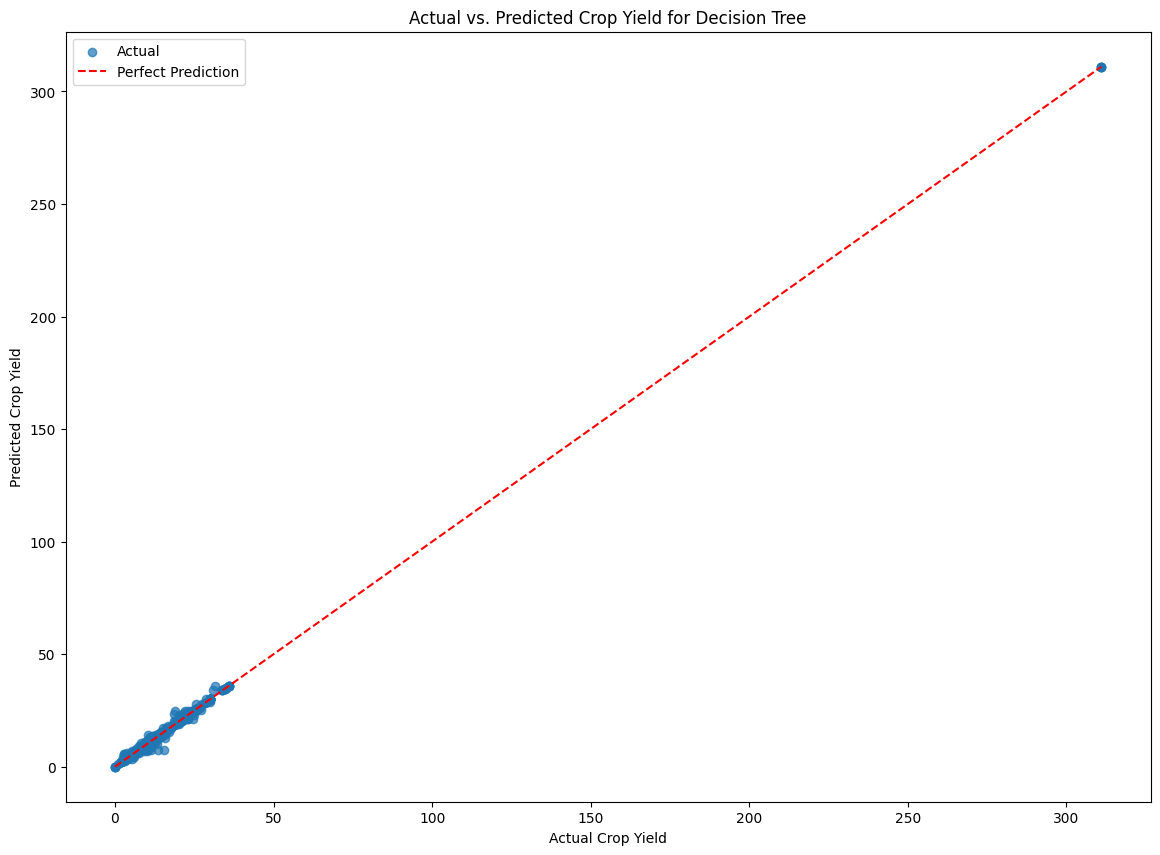

In [27]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Load the saved models

tree_model = joblib.load("/content/stacking_with_decision_tree_as_final_estimator_model.pkl")
knn_model = joblib.load("/content/stacking_with_knn_as_final_estimator_model.pkl")
rf_model = joblib.load("/content/stacking_with_gradient_boosting_base_as_final_estimator_model.pkl")
gb_model = joblib.load("/content/stacking_with_gradient_boosting_as_final_estimator_model.pkl")
ada_model = joblib.load("/content/stacking_with_adaboost_as_final_estimator_model.pkl")
cat_model = joblib.load("/content/stacking_with_catboost_as_final_estimator_model.pkl")
#linear_model = joblib.load("/content/svr_bagging_model.pkl")
#svm_model = joblib.load("/content/stacking_with_svr_as_final_estimator_model.pkl")
xgb_model = joblib.load("/content/stacking_with_xgboost_as_final_estimator_model.pkl")

# Create a dictionary for loaded models
loaded_models = {
    'K-Nearest Neighbors': knn_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'AdaBoost': ada_model,
    'CatBoost': cat_model,
    #'Linear Regression': linear_model,
    #'Support Vector Machine': svm_model,
    'XGBoost': xgb_model,
    'Decision Tree': tree_model,
}

# Evaluate and store RMSE scores for each model
rmse_scores = []
model_names = list(loaded_models.keys())
predictions_dict = {}

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mse = mean_squared_error(y_test, test_predictions)
    rmse = np.sqrt(mse)
    rmse_scores.append(rmse)
    predictions_dict[model_name] = {'actual': y_test, 'predicted': test_predictions}

# Scatter plot for actual vs. predicted for each model
for model_name, predictions in predictions_dict.items():
    plt.figure(figsize=(14, 10))
    plt.scatter(predictions['actual'], predictions['predicted'], label='Actual', alpha=0.7)
    plt.plot([min(predictions['actual']), max(predictions['actual'])], [min(predictions['actual']), max(predictions['actual'])], '--', color='red', label='Perfect Prediction')
    plt.xlabel("Actual Crop Yield")
    plt.ylabel("Predicted Crop Yield")
    plt.title(f"Actual vs. Predicted Crop Yield for {model_name}")
    plt.legend()
    plt.show()


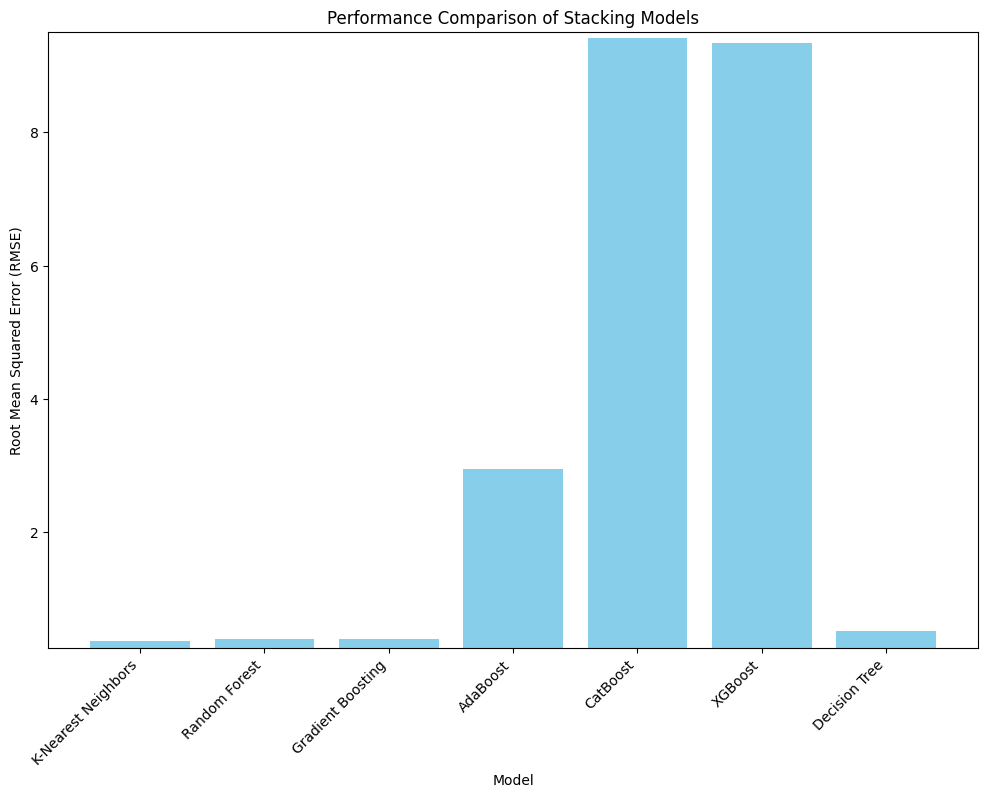

In [28]:
# Bar chart for RMSE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Performance Comparison of Stacking Models')
plt.ylim([min(rmse_scores) - 0.1, max(rmse_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


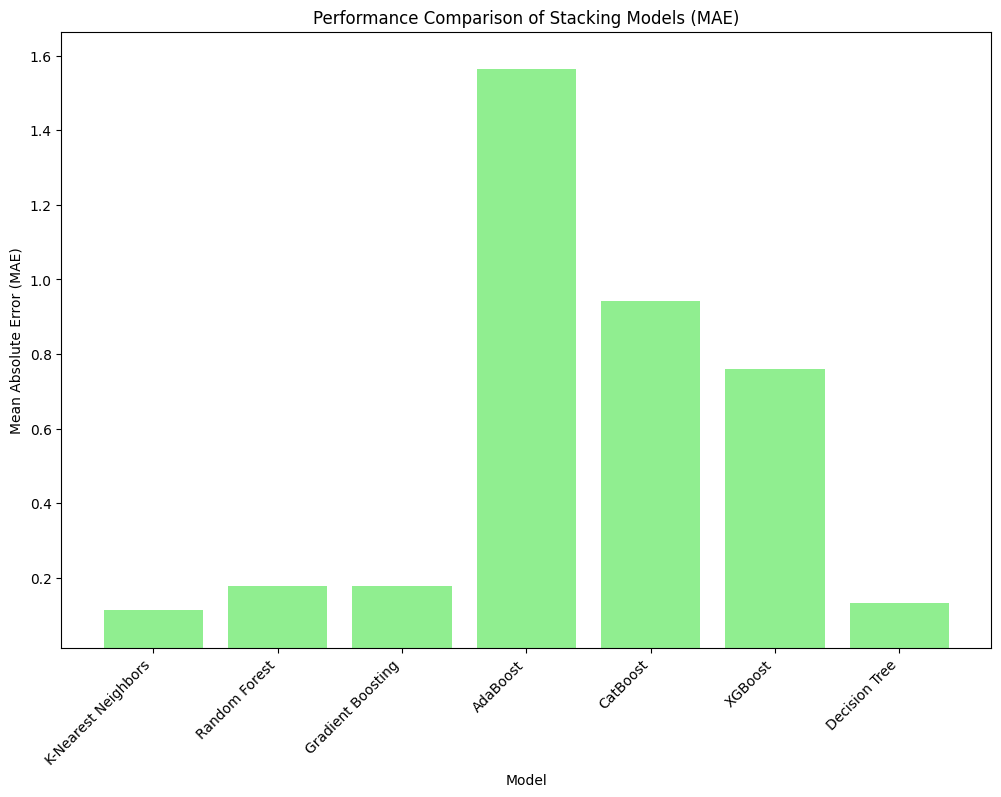

In [29]:
from sklearn.metrics import mean_absolute_error

# Evaluate and store MAE scores for each model
mae_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    mae = mean_absolute_error(y_test, test_predictions)
    mae_scores.append(mae)

# Bar chart for MAE scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, mae_scores, color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performance Comparison of Stacking Models (MAE)')
plt.ylim([min(mae_scores) - 0.1, max(mae_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()


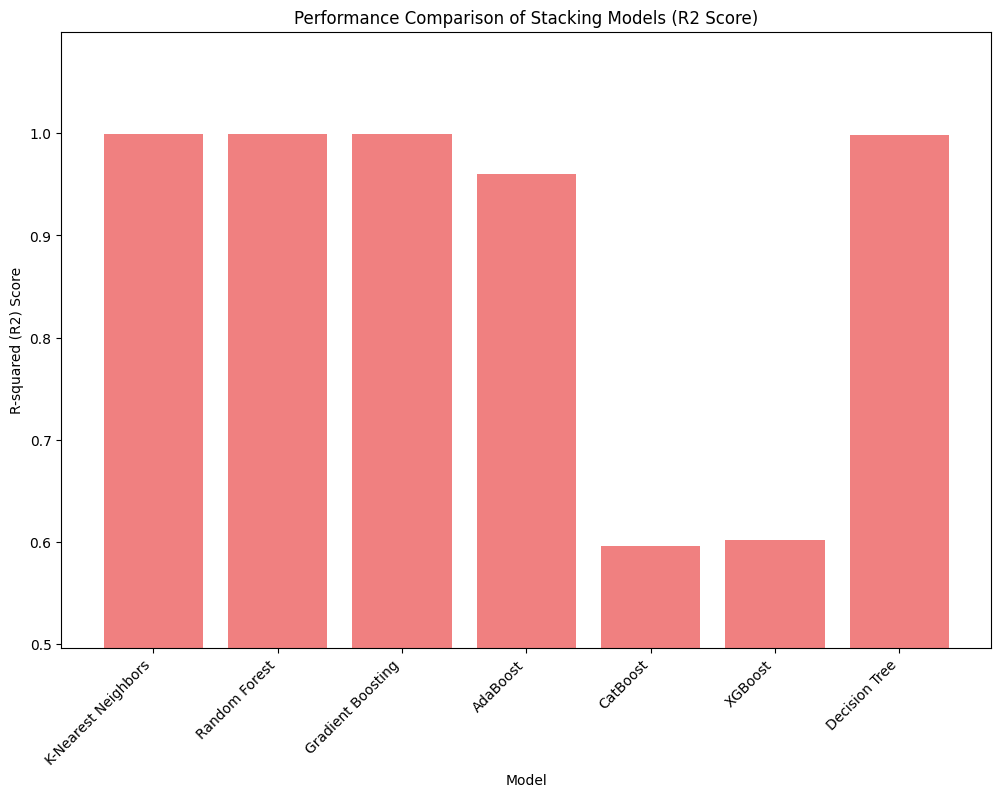

In [30]:
from sklearn.metrics import r2_score

# Evaluate and store R2 scores for each model
r2_scores = []

for model_name, loaded_model in loaded_models.items():
    test_predictions = loaded_model.predict(pro_X_test)
    r2 = r2_score(y_test, test_predictions)
    r2_scores.append(r2)

# Bar chart for R2 scores
plt.figure(figsize=(12, 8))
plt.bar(model_names, r2_scores, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Performance Comparison of Stacking Models (R2 Score)')
plt.ylim([min(r2_scores) - 0.1, max(r2_scores) + 0.1])  # Adjust the y-axis limits if needed
plt.xticks(rotation=45, ha='right')
plt.show()
